In [2]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
# ## Project for CMSC/STAT 11800 - Fall Quarter 2020 (due November 3, Election Day)

# This is not a group project. You may discuss the project with other students but you should code and write the report independently. You should acknowledge any help in writing. The score will be based on:
# -  clarity and soundness of the arguments and conclusions; 
# -  use of data to back up arguments and analysis quality;  
# -  insightfulness of the results;
# -  quality of the data vizualizations, summaries used, and overall presentation.

# The project is inspired from the current Fall Data Challenge from the American Statistical Association. You can find information about it here:
# https://thisisstatistics.org/falldatachallenge/

# The goal of the ASA Data challenge is to encourage contestants to "apply their statistical skills to real voter-turnout data and provide insights to inspire more people to vote in the upcoming November 3rd election" using a "dataset about voting behaviors in the U.S. from the Census Bureau and Bureau of Labor Statistics, provided by the IPUMS organization and curated by ASA": 

# https://drive.google.com/file/d/1q4k2w6PXV8IIlsuiFYpElOlG23DNr7I6/view

# The goal of this project is gain insight in voter-turnout using the tools you have learned so far in this class.

# ### The Data 

# You can use any data you can find to get insight into voting behavior, but you need to specify the provenance of the data in your report (if different than what the ASA challenge provides). 

# We saved the most relevant files from the ASA datasets, and show you how to access them below. The ASA curated dataset contains a folder called *data_comma_delimited*  where all files are comma-limited in .csv
# - *data_full.csv*: Voter data from 2004 to 2018; 643,429 rows and 28 columns
# - *data_2016.csv*: Voter data from 2016 only; 79,820 rows and 28 columns
# - *data_2018.csv*: Voter data from 2018 only; 73,004 rows and 28 columns
# - *data_2016_2018.csv*: Voter data from 2016 and 2018; 152,824 rows and 28 columns
# - *data_dictionary.csv* (posted on Canvas)

# The cells below show you how to get the 2018 data and the complete data (2004 to 2018). Information about the columns are in the two files we posted on Canvas. We are not suggesting that you should use only the 2018 data or all years of data, but provide them for convenience. For computational reasons, read only the data that you plan to use in the notebook.

# #### The next cells that contains code that will allow you to read the data into tables called "voters18_table" and "voters_table". They also shows the first 10 rows. The larger table takes few seconds to load. 

In [2]:
# voter18_table=Table.read_table('http://www.stat.uchicago.edu/~nicolae/118/data_2016.csv')
# voter18_table

In [2]:
voter_table=Table.read_table('http://www.stat.uchicago.edu/~nicolae/118/data_full.csv')
vt_2016 = voter_table.where("YEAR", 2016)
#For the purpose of this project, I decided to utilize data from the most recent completed election, which took place in 2016.

## The Assignment

### Report on your findings about voter registration and voter turnout. Can you suggest interventions for getting more people to vote? You must submit two files: 

1. The Jupyter Notebook that contains all the code you use for the analysis. You do not need to submit data you used, but just indicate how you obtained it in the Notebook.

2. A PDF report of your findings. **This report should be at most 4 pages long, with at most two pages of text.** Use data visualization and data summaries to justify your conclusions.

The report should answer at the minimum the following questions:

A. **Voter registration.** Are voter registration patterns different by age, sex and race? Note that there are three variables that you can use to understand voter registration: VOREG, VOREGHOW and VOYNOTREG. [Hint: One way to deal with age data is to bucket ages into groups, such as under 25, 25-40, 40-60, 60+.]

B. **Voter turnout.** Similarly, how does voting (VOTED, VOTEWHEN, VOWHYNOT) differ by age, sex, race? Is there a strong relationship between voter registration and voter turnout?

C. **Education**. How does having a degree beyond high school (i.e., Associates, Bachelors, Masters, Professional or Doctorate) influence voting and the reasons for not voting?

D. **State patterns**. How do voting registration patterns vary by state? Which states had the highest percentage of those surveyed who did not vote?

E. Suggest a way to inspire/convince more people to vote and demonstrate why you believe it could be effective.

In [4]:
#Here I analyze if voter registration age.
vr_reg_age = vt_2016.select("AGE", "VOREG", "VOREGHOW", "VOWHYNOT", "VOYNOTREG")
age_array = vr_reg_age.column("AGE")
why_not_register = vr_reg_age.column("VOYNOTREG")
age_array

array([70, 63, 59, ..., 46, 47, 41])

In [5]:
# BIN AGES INTO BINS, AND THEN RE-DO GROUP
#GROUP and then rename columns

# Create translation table for all the numbers in "voreg"
# use table.join('col in trans table with short', orig table, "col in trans table with translation")

# Then put into pivot
group_table_test = vr_reg_age.group(["AGE", "VOREG"])
group_table_test

C:\Users\19177\Anaconda2\envs\snakes\lib\site-packages\datascience\tables.py:630: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


AGE,VOREG,count
18,1,392
18,2,103
18,96,3
18,97,28
18,99,528
19,1,360
19,2,143
19,96,1
19,97,32
19,99,534


In [6]:
#People's age and whether or not they voted
# REDO, TRY GROUP METHOD

num_btwn_18_25 = np.array([])
num_btwn_25_40 = np.array([])
num_btwn_40_60 = np.array([])
num_60_up = np.array([])

btwn_18_25_not_reg = 0
btwn_25_40_not_reg = 0
btwn_40_60_not_reg = 0
above_60_not_reg = 0

btwn_18_25_reg = 0
btwn_25_40_reg = 0
btwn_40_60_reg = 0
above_60_reg = 0

btwn_18_25_ref = 0
btwn_25_40_ref = 0
btwn_40_60_ref = 0
above_60_ref = 0

btwn_18_25_dk = 0
btwn_25_40_dk = 0
btwn_40_60_dk = 0
above_60_dk = 0

#REASONS FOR WHY DIDN'T REGISTER TO VOTE
btwn_18_25_reg_deadlines = 0
btwn_25_40_reg_deadlines = 0
btwn_40_60_reg_deadlines = 0
above_60_reg_deadlines = 0

btwn_18_25_dk_how_reg = 0
btwn_25_40_dk_how_reg = 0
btwn_40_60_dk_how_reg = 0
above_60_dk_how_reg = 0

btwn_18_25_res_req = 0
btwn_25_40_res_req = 0
btwn_40_60_res_req = 0
above_60_res_req = 0

btwn_18_25_ill = 0
btwn_25_40_ill = 0
btwn_40_60_ill = 0
above_60_ill = 0

btwn_18_25_not_i = 0
btwn_25_40_not_i = 0
btwn_40_60_not_i = 0
above_60_not_i = 0

btwn_18_25_english = 0
btwn_25_40_english = 0
btwn_40_60_english = 0
above_60_english = 0

btwn_18_25_nodiff = 0
btwn_25_40_nodiff = 0
btwn_40_60_nodiff = 0
above_60_nodiff = 0

btwn_18_25_not_el = 0
btwn_25_40_not_el = 0
btwn_40_60_not_el = 0
above_60_not_el = 0

btwn_18_25_other = 0
btwn_25_40_other = 0
btwn_40_60_other = 0
above_60_other = 0

btwn_18_25_dk_why_not_reg = 0
btwn_25_40_dk_why_not_reg = 0
btwn_40_60_dk_why_not_reg = 0
above_60_dk_why_not_reg = 0

voreg_array = vr_reg_age.column("VOREG")


for i in np.arange(len(age_array)):
    if age_array[i] < 25:
        num_btwn_18_25 = np.append(num_btwn_18_25, age_array[i])
        if voreg_array[i] == 1:
            btwn_18_25_not_reg+=1  
        if voreg_array[i] == 2:
            btwn_18_25_reg+=1
        if voreg_array[i] == 96:
            btwn_18_25_ref+=1 
        if voreg_array[i] == 97:
            btwn_18_25_dk+=1 
            
        if why_not_register[i] == 1:
            btwn_18_25_reg_deadlines +=1
        if why_not_register[i] == 2:
            btwn_18_25_dk_how_reg +=1
        if why_not_register[i] == 3:
            btwn_18_25_res_req +=1
        if why_not_register[i] == 4:
            btwn_18_25_ill +=1
        if why_not_register[i] == 6:
            btwn_18_25_not_i +=1
        if why_not_register[i] == 5:
            btwn_18_25_english +=1
        if why_not_register[i] == 7:
            btwn_18_25_nodiff +=1
        if why_not_register[i] == 8:
            btwn_18_25_not_el +=1
        if why_not_register[i] == 9:
            btwn_18_25_other +=1
        if why_not_register[i] == 97:
            btwn_18_25_dk_why_not_reg +=1
    if age_array[i] >= 25 and age_array[i] < 40:
        num_btwn_25_40 = np.append(num_btwn_25_40, age_array[i])
        if voreg_array[i] == 1:
            btwn_25_40_not_reg+=1
        if voreg_array[i] == 2:
            btwn_25_40_reg+=1
        if voreg_array[i] == 96:
            btwn_25_40_ref+=1
        if voreg_array[i] == 97:
            btwn_25_40_dk+=1
            
        if why_not_register[i] == 1:
            btwn_25_40_reg_deadlines +=1
        if why_not_register[i] == 2:
            btwn_25_40_dk_how_reg +=1
        if why_not_register[i] == 3:
            btwn_25_40_res_req +=1
        if why_not_register[i] == 4:
            btwn_25_40_ill +=1
        if why_not_register[i] == 6:
            btwn_25_40_not_i +=1
        if why_not_register[i] == 5:
            btwn_25_40_english +=1
        if why_not_register[i] == 7:
            btwn_25_40_nodiff +=1
        if why_not_register[i] == 8:
            btwn_25_40_not_el +=1
        if why_not_register[i] == 9:
            btwn_25_40_other +=1
        if why_not_register[i] == 97:
            btwn_25_40_dk_why_not_reg +=1
    if age_array[i] >= 40 and age_array[i] < 60:
        num_btwn_40_60 = np.append(num_btwn_40_60, age_array[i])
        if voreg_array[i] == 1:
            btwn_40_60_not_reg+=1
        if voreg_array[i] == 2:
            btwn_40_60_reg+=1
        if voreg_array[i] == 96:
            btwn_40_60_ref+=1
        if voreg_array[i] == 97:
            btwn_40_60_dk+=1
            
        if why_not_register[i] == 1:
            btwn_40_60_reg_deadlines +=1
        if why_not_register[i] == 2:
            btwn_40_60_dk_how_reg +=1
        if why_not_register[i] == 3:
            btwn_40_60_res_req +=1
        if why_not_register[i] == 4:
            btwn_40_60_ill +=1
        if why_not_register[i] == 6:
            btwn_40_60_not_i +=1
        if why_not_register[i] == 5:
            btwn_40_60_english +=1
        if why_not_register[i] == 7:
            btwn_40_60_nodiff +=1
        if why_not_register[i] == 8:
            btwn_40_60_not_el +=1
        if why_not_register[i] == 9:
            btwn_40_60_other +=1
        if why_not_register[i] == 97:
            btwn_40_60_dk_why_not_reg +=1
    if age_array[i] >= 60:
        num_60_up = np.append(num_60_up, age_array[i])
        if voreg_array[i] == 1:
            above_60_not_reg+=1
        if voreg_array[i] == 2:
            above_60_reg+=1
        if voreg_array[i] == 96:
            above_60_ref+=1
        if voreg_array[i] == 97:
            above_60_dk+=1
            
        if why_not_register[i] == 1:
            above_60_reg_deadlines +=1
        if why_not_register[i] == 2:
            above_60_dk_how_reg +=1
        if why_not_register[i] == 3:
            above_60_res_req +=1
        if why_not_register[i] == 4:
            above_60_ill +=1
        if why_not_register[i] == 6:
            above_60_not_i +=1
        if why_not_register[i] == 5:
            above_60_english +=1
        if why_not_register[i] == 7:
            above_60_nodiff +=1
        if why_not_register[i] == 8:
            above_60_not_el +=1
        if why_not_register[i] == 9:
            above_60_other +=1
        if why_not_register[i] == 97:
            above_60_dk_why_not_reg +=1
    
num_btwn_18_25_occ = len(num_btwn_18_25)    
num_btwn_25_40_occ = len(num_btwn_25_40)
num_btwn_40_60_occ = len(num_btwn_40_60)
num_60_up_occ = len(num_60_up)

did_not_reg = np.array([btwn_18_25_not_reg, btwn_25_40_not_reg, btwn_40_60_not_reg, above_60_not_reg])
registered = np.array([btwn_18_25_reg, btwn_25_40_reg, btwn_40_60_reg, above_60_reg])
refused = np.array([btwn_18_25_ref, btwn_25_40_ref, btwn_40_60_ref, above_60_ref])
dont_know = np.array([btwn_18_25_dk, btwn_25_40_dk, btwn_40_60_dk, above_60_dk])

per_reg_18_25 = btwn_18_25_reg/num_btwn_18_25_occ
per_reg_25_40 = btwn_25_40_reg/num_btwn_25_40_occ
per_reg_40_60 = btwn_40_60_reg/num_btwn_40_60_occ
per_reg_above_60 = above_60_not_reg/num_60_up_occ

percentage_registered = np.array([round(per_reg_18_25, 3), round(per_reg_25_40, 3), round(per_reg_40_60, 3), round(per_reg_above_60, 3)])

per_dk_18_25 = btwn_18_25_dk/num_btwn_18_25_occ
per_dk_25_40 = btwn_25_40_dk/num_btwn_25_40_occ
per_dk_40_60 = btwn_40_60_dk/num_btwn_40_60_occ
per_dk_above_60 = above_60_dk/num_60_up_occ

proportion_dk = np.array([round(per_dk_18_25, 3), round(per_dk_25_40, 3), round(per_dk_40_60, 3), round(per_dk_above_60, 3)])

age_cats = np.array(["Under 25", "25-40", "40-60", "60 and Above"])

age_cats_counts = np.array([num_btwn_18_25_occ, num_btwn_25_40_occ, num_btwn_40_60_occ, num_60_up_occ])

ages_binned_table = Table().with_columns("Age Categories", age_cats, "Count", age_cats_counts, "Did Not Register", did_not_reg, "Registered", registered, "Refused", refused, "Don't Know", dont_know, "Proportion Knowledgeably Registered", percentage_registered, "Proportion Don't Know", proportion_dk)

ages_binned_table






Age Categories,Count,Did Not Register,Registered,Refused,Don't Know,Proportion Knowledgeably Registered,Proportion Don't Know
Under 25,7948,2339,1112,15,171,0.14,0.022
25-40,18866,3682,2304,17,292,0.122,0.015
40-60,27050,3746,2458,23,245,0.091,0.009
60 and Above,25956,2669,2030,15,136,0.103,0.005


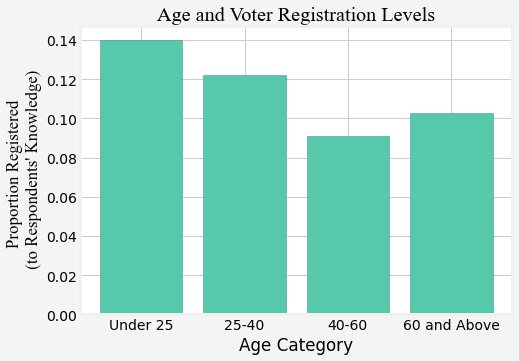

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('#f2f5f4')
ax.set_facecolor('white')
ax.bar(ages_binned_table.column("Age Categories"), ages_binned_table.column("Proportion Knowledgeably Registered"), color="#57c9ab", edgecolor='#3e947d')
ax.set_ylabel("Proportion Registered \n (to Respondents' Knowledge)", fontname='Times New Roman')
ax.set_title('Age and Voter Registration Levels', fontname='Times New Roman')
ax.set_xlabel("Age Category")
plt.show()

#According to this plot, citizens under the age of 25 have the highest voter registration rate, followed by citizens in the 25-40 age bracket. Citizens between ages 40-60 have the lowest rate of voter registration; lower than that of citizens ages 60 and above. Why does the population of 40-60 year olds have the lowest voter registration rates? We can explore answers to this question through conducting further analysis, such as if the population of individuals ages 40-60 simply has a higher rate of lack of knowledge regarding voter registration status. 

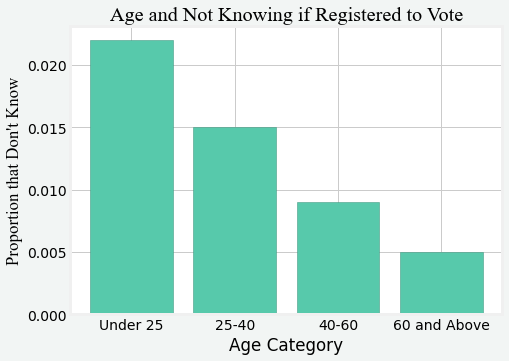

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('#f2f5f4')
ax.set_facecolor('white')
ax.bar(ages_binned_table.column("Age Categories"), ages_binned_table.column("Proportion Don't Know"), color="#57c9ab", edgecolor='#3e947d')
ax.set_ylabel("Proportion that Don't Know", fontname='Times New Roman')
ax.set_title('Age and Not Knowing if Registered to Vote', fontname='Times New Roman')
ax.set_xlabel("Age Category")
plt.show()

#Despite having the highest rates of voter registration, the population of citizens under the age of 25 also have the highest rates of not knowing whether they are registered to vote. The population previously in question due to their lowest rate of voting registration, the 40-60 age bracket, happens to have the lowest rates of lack of knowledge regarding voter registration status. Therefore, simply not knowing whether or not they were registered is not correlated with their low voter registration rate. 

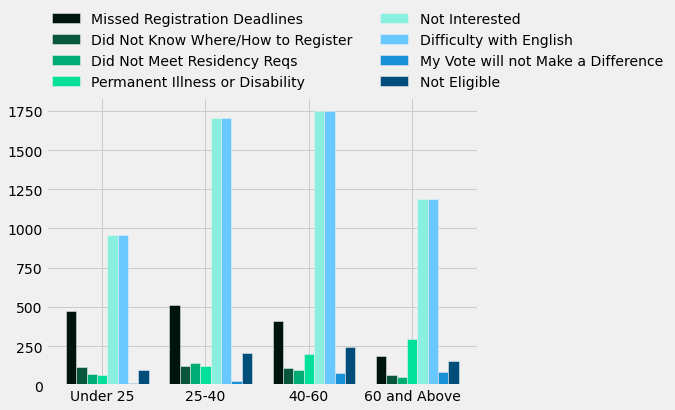

In [9]:
#Next, we will examine the various reasons why individuals in the given age brackets decided against voting. Perhaps the information we derive from this analysis will help us to understand why the voter


data = [[btwn_18_25_reg_deadlines, btwn_25_40_reg_deadlines, btwn_40_60_reg_deadlines, above_60_reg_deadlines],
 [btwn_18_25_dk_how_reg, btwn_25_40_dk_how_reg, btwn_40_60_dk_how_reg, above_60_dk_how_reg],
 [btwn_18_25_res_req, btwn_25_40_res_req, btwn_40_60_res_req, above_60_res_req], [btwn_18_25_ill, btwn_25_40_ill, btwn_40_60_ill, above_60_ill], [btwn_18_25_not_i, btwn_25_40_not_i, btwn_40_60_not_i, above_60_not_i], [btwn_18_25_english, btwn_25_40_english, btwn_40_60_english, above_60_english], [btwn_18_25_nodiff, btwn_25_40_nodiff, btwn_40_60_nodiff, above_60_nodiff], [btwn_18_25_not_el, btwn_25_40_not_el, btwn_40_60_not_el, above_60_not_el]]
# [above_60_reg_deadlines, above_60_dk_how_reg, above_60_res_req, above_60_ill, above_60_not_i, above_60_english, above_60_nodiff, above_60_not_el, above_60_other, above_60_dk_why_not_reg]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = '#00140e', width = 0.10)
ax.bar(X + 0.10, data[1], color = '#08573d', width = 0.10)
ax.bar(X + 0.20, data[2], color = '#00ab74', width = 0.10)
ax.bar(X + 0.30, data[3], color = '#02e099', width = 0.10)
ax.bar(X + 0.40, data[4], color = '#89f0e0', width = 0.10)
ax.bar(X + 0.50, data[4], color = '#69c8ff', width = 0.10)
ax.bar(X + 0.60, data[5], color = '#188fd6', width = 0.10)
ax.bar(X + 0.70, data[6], color = '#014e7a', width = 0.10)
# ax.bar(X + 0.50, data[3], color = 'r', width = 0.25)



ax.set_xticks([0.30,1.30,2.30,3.30])
ax.set_xticklabels(ages_binned_table.column("Age Categories"))
ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
            borderaxespad=0, frameon=False, labels=['Missed Registration Deadlines','Did Not Know Where/How to Register','Did Not Meet Residency Reqs', 'Permanent Illness or Disability', 'Not Interested', 'Difficulty with English', 'My Vote will not Make a Difference', 'Not Eligible'])
plt.show()

#The following figure visualizes the various resons why individuals in certain age groups failed to register to vote. It is apparent that the two biggest barriers to voting registration for individuals from all age groups is difficulty with English and the lack of interest in US politics/voting in general. Potential solutions that can get more people to register to vote is to provide more robust language translation services at voter registration sites. Such services should help assist individuals with English language difficulties in voting. In addition, it is apparent that a large number of people feel disconnected with and uninterested in the US political process. A potential solution to this may be expanding programs that educate individuals regarding the importance of their participation in the US political process, as well as partnering with firms to create a culture of involvement in politics amongst employees. Social influence through work environments can help to inspire workers to go out and vote. 

In [10]:
#Voreg and sex
voreg_sex = vt_2016.select("SEX", "VOREG")
sex_un = sex_voreg_sorted_table.column("SEX")
sex_full = np.array([])

male_count = 37600
female_count = 42220

sex_voreg_sorted_table = vt_2016.group(["SEX", "VOREG"])

for sex in sex_un:
    if sex == 1:
        sex_full = np.append(sex_full, "Male")
    if sex == 2:
        sex_full = np.append(sex_full, "Female")
        
sex_voreg_sorted_table = sex_voreg_sorted_table.with_columns("SEXES", sex_full).drop("SEX").relabel("SEXES", "SEX")

NameError: name 'sex_voreg_sorted_table' is not defined

In [11]:
# voreg_orig = sex_voreg_sorted_table.column("VOREG")
# voreg_new = np.array([])

# sex_voreg_sorted_table = sex_voreg_sorted_table.where("VOREG", are.below(3))
# sex_voreg_sorted_table

# for vor in voreg_orig:
#     if vor == 1:
#         voreg_new = np.append(voreg_new, "Did not register")
#     if vor == 2:
#         voreg_new = np.append(voreg_new, "Registered")

sex_voreg_sorted_table = sex_voreg_sorted_table.with_columns("Registration Status", voreg_new)
experiment = np.array(["Men who Did Not Register", "Men Who Registered", "Women who Did Not Register", "Women who Registered"])
sex_voreg_sorted_table = sex_voreg_sorted_table.with_columns("Reg Status", experiment).drop("Registration Status", "SEX")

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('#f2f5f4')
ax.set_facecolor('white')
ax.bar(sex_voreg_sorted_table.column("Reg Status"), sex_voreg_sorted_table.column("count"), color="#57c9ab", edgecolor='#3e947d')
ax.set_ylabel("Count", fontname='Times New Roman')
ax.set_title('Sex and Voter Registration Status', fontname='Times New Roman')
plt.xticks(ha="right", rotation=45)
plt.show()


NameError: name 'sex_voreg_sorted_table' is not defined

In [12]:
# NOW ANALYZE RACE and VOREG, VOREGHOW and VOYNOTREG
voreg_race = vt_2016.select("RACE", "VOREG")
race_num = voreg_race.column("RACE")
race_full = np.array([])

for race in race_num:
    if race == 100:
        race_full = np.append(race_full, "White")
    if race == 200:
        race_full = np.append(race_full, "Black")
    if race == 300:
        race_full = np.append(race_full, "American Indian/Aleut/Eskimo")
    if race == 650:
        race_full = np.append(race_full, "Asian or Pacific Islander")
    if race == 651:
        race_full = np.append(race_full, "Asian only")
    if race == 652:
        race_full = np.append(race_full, "Hawaiian/Pacific Islander only")
    if race == 700:
        race_full = np.append(race_full, "Other (single) race, n.e.c.")
    if race == 801:
        race_full = np.append(race_full, "White-Black")
    if race == 802:
        race_full = np.append(race_full, "White-American Indian")
    if race == 803:
        race_full = np.append(race_full, "White-Asian")
    if race == 804:
        race_full = np.append(race_full, "White-Hawaiian/Pacific Islander")
    if race == 805:
        race_full = np.append(race_full, "Black-American Indian")
    if race == 806:
        race_full = np.append(race_full, "Black-Asian")
    if race == 807:
        race_full = np.append(race_full, "Black-Hawaiian/Pacific Islander")
    if race == 808:
        race_full = np.append(race_full, "American Indian-Asian")
    if race == 809:
        race_full = np.append(race_full, "Asian-Hawaiian/Pacific Islander")
    if race == 810:
        race_full = np.append(race_full, "White-Black-American Indian")
    if race == 811:
        race_full = np.append(race_full, "White-Black-Asian")
    if race == 812:
        race_full = np.append(race_full, "White-American Indian-Asian")
    if race == 813:
        race_full = np.append(race_full, "White-Asian-Hawaiian/Pacific Islander")
    if race == 814:
        race_full = np.append(race_full, "White-Black-American Indian-Asian")
    if race == 815:
        race_full = np.append(race_full, "American Indian-Hawaiian/Pacific Islander")
    if race == 816:
        race_full = np.append(race_full, "White-Black--Hawaiian/Pacific Islander")
    if race == 817:
        race_full = np.append(race_full, "White-American Indian-Hawaiian/Pacific Islander")
    if race == 818:
        race_full = np.append(race_full, "Black-American Indian-Asian")
    if race == 819:
        race_full = np.append(race_full, "White-American Indian-Asian-Hawaiian/Pacific Islander")
    if race == 820:
        race_full = np.append(race_full, "Two or three races, unspecified")
    if race == 830:
        race_full = np.append(race_full, "Four or five races, unspecified")
    if race == 999:
        race_full = np.append(race_full, "Blank")

race_full        
     

KeyboardInterrupt: 

In [ ]:
voreg_race = voreg_race.with_column("Races", race_full).drop("RACE")
voreg_race.group(["Races", "VOREG"])
voreg_num = voreg_race.column("VOREG")
voreg_full = np.array([])

for voreg in voreg_num:
    if voreg == 1:
        voreg_full = np.append(voreg_full, "Did not register")
    if voreg == 2:
        voreg_full = np.append(voreg_full, "Registered")
    if voreg == 96:
        voreg_full = np.append(voreg_full, "Refused")
    if voreg == 97:
        voreg_full = np.append(voreg_full, "Don't Know")
    if voreg == 98:
        voreg_full = np.append(voreg_full, "Not Reported")
    if voreg == 99:
        voreg_full = np.append(voreg_full, "Not in universe")
voreg_race = voreg_race.with_columns("Registration Status", voreg_full).drop("VOREG")


In [ ]:
voreg_race_pivot = voreg_race.pivot("Races", "Registration Status")
voreg_race_pivot = voreg_race_pivot.drop("Black-American Indian-Asian", "American Indian-Asian", "Four or five races, unspecified", "Two or three races, unspecified", "White-American Indian-Asian", "White-American Indian-Asian-Hawaiian/Pacific Islander", "White-American Indian-Hawaiian/Pacific Islander", "White-Black--Hawaiian/Pacific Islander", "White-Black-Asian")
voreg_race_pivot = voreg_race_pivot.remove(2).remove(3).remove(2)
voreg_race_pivot

In [ ]:
voreg_race_pivot = voreg_race_pivot.append(["Totals", sum(voreg_race_pivot.column(1)), sum(voreg_race_pivot.column(2)), sum(voreg_race_pivot.column(3)), sum(voreg_race_pivot.column(4)), sum(voreg_race_pivot.column(5)), sum(voreg_race_pivot.column(6)), sum(voreg_race_pivot.column(7)), sum(voreg_race_pivot.column(8)), sum(voreg_race_pivot.column(9)), sum(voreg_race_pivot.column(10)), sum(voreg_race_pivot.column(11)), sum(voreg_race_pivot.column(12)), sum(voreg_race_pivot.column(13)), sum(voreg_race_pivot.column(14)), sum(voreg_race_pivot.column(15))]).append(["Proportion Registered", np.round(voreg_race_pivot.column(1)[2]/voreg_race_pivot.column(1)[3], 2), np.round(voreg_race_pivot.column(2)[2]/voreg_race_pivot.column(2)[3], 2), np.round(voreg_race_pivot.column(3)[2]/voreg_race_pivot.column(3)[3], 2), np.round(voreg_race_pivot.column(4)[2]/voreg_race_pivot.column(4)[3], 2), np.round(voreg_race_pivot.column(5)[2]/voreg_race_pivot.column(5)[3], 2), np.round(voreg_race_pivot.column(6)[2]/voreg_race_pivot.column(6)[3], 2), np.round(voreg_race_pivot.column(7)[2]/voreg_race_pivot.column(7)[3], 2), np.round(voreg_race_pivot.column(8)[2]/voreg_race_pivot.column(8)[3], 2), np.round(voreg_race_pivot.column(9)[2]/voreg_race_pivot.column(9)[3], 2), np.round(voreg_race_pivot.column(10)[2]/voreg_race_pivot.column(10)[3], 2), np.round(voreg_race_pivot.column(11)[2]/voreg_race_pivot.column(11)[3], 2), np.round(voreg_race_pivot.column(12)[2]/voreg_race_pivot.column(12)[3], 2), np.round(voreg_race_pivot.column(13)[2]/voreg_race_pivot.column(13)[3], 2), np.round(voreg_race_pivot.column(14)[2]/voreg_race_pivot.column(14)[3], 2), np.round(voreg_race_pivot.column(15)[2]/voreg_race_pivot.column(15)[3], 2)])

In [ ]:
voreg_race_table_column_names = voreg_race_pivot._columns.keys()
voreg_race_table = voreg_race_pivot.remove(0).remove(0).remove(0).remove(0)
voreg_race_table

In [ ]:
voreg_race_reorg = Table().with_columns("Race", ["American Indian/Aleut/Eskimo", "Asian only", "Asian-Hawaiian/Pacific Islander", "Black", "Black-American Indian", "Black-Asian", "Black-Hawaiian/Pacific Islander", "Hawaiian/Pacific Islander only", "White", "White-American Indian", "White-Asian", "White-Asian-Hawaiian/Pacific Islander", "White-Black", "White-Black-American Indian", "White-Hawaiian/Pacific Islander"], "Proportion Registered", [0.34, 0.23, 0.24, 0.44, 0.32, 0.29, 0, 0.32, 0.38, 0.36, 0.4, 0.14, 0.34, 0.69, 0.31])
voreg_race_reorg

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('#f2f5f4')
ax.set_facecolor('white')
ax.bar(voreg_race_reorg.column("Race"), voreg_race_reorg.column("Proportion Registered"), color="#57c9ab", edgecolor='#3e947d')
ax.set_ylabel("Proportion Registered", fontname='Times New Roman')
ax.set_title('Race and Voter Registration', fontname='Times New Roman')
plt.xticks(ha="right", rotation=45)
plt.show()

#According to this table, Black-Hawaiian/Pacific Islanders, White-Asian-Hawaiian/Pacific Islanders, and Asians have the lowest rates of voter registration. Since the data points available for those race groups are small in number, it is necessary to increase the sample size in order for the conclusions drawn to be accurate. However, based on the sample size we currently have, it appears that individuals of the aforementioned race groups are less likely to register to vote.  

In [ ]:
#VOYNOTREG and RACE
voynotreg_race = vt_2016.select("RACE", "VOYNOTREG")
voynotreg_race = voynotreg_race.with_column("Races", race_full).drop("RACE")
voynotreg_race

voynotreg_race.column("Races")

In [ ]:
#Here, I take the 3 races that are least likely to register to vote, and analyze why it is that they didn't register
voynotreg_nums = voynotreg_race.column("VOYNOTREG")
voynotreg_full = np.array([])

bhpi_reg_deadlines = 0
wahpi_reg_deadlines = 0
a_reg_deadlines = 0

bhpi_dk_how_reg = 0
wahpi_dk_how_reg = 0
a_dk_how_reg = 0

bhpi_res_req = 0
wahpi_res_req = 0
a_res_req = 0

bhpi_ill = 0
wahpi_ill = 0
a_ill = 0

bhpi_not_i = 0
wahpi_not_i = 0
a_not_i = 0

bhpi_english = 0
wahpi_english = 0
a_english = 0

bhpi_nodiff = 0
wahpi_nodiff = 0
a_nodiff = 0

bhpi_not_el = 0
wahpi_not_el = 0
a_not_el = 0

bhpi_other = 0
wahpi_other = 0
a_other = 0

bhpi_dk_why_not_reg = 0
wahpi_dk_why_not_reg = 0
a_dk_why_not_reg = 0

# voynotreg_race.where("Races", ["Black-Hawaiian/Pacific Islander", "White-Asian-Hawaiian/Pacific Islanders", "Asian only"])
bhpi_why_not_reg_table = voynotreg_race.where("Races", "Black-Hawaiian/Pacific Islander")
#ERROR HERE. NOTHING POPPING UP
wahpi_why_not_reg_table = voynotreg_race.where("Races", "White-Asian-Hawaiian/Pacific Islanders")
a_why_not_reg_table = voynotreg_race.where("Races", "Asian only")

for indiv in bhpi_why_not_reg_table.column("VOYNOTREG"):
    if indiv == 6:
        bhpi_not_i +=1
# for indiv in wahpi_why_not_reg_table.column("VOYNOTREG"):
#     if indiv == 6:
#         wahpi_not_i +=1
        
for indiv in a_why_not_reg_table.column("VOYNOTREG"):
    if indiv == 1:
        a_reg_deadlines +=1
    if indiv == 2:
        a_dk_how_reg +=1
    if indiv == 3:
        a_res_req +=1
    if indiv == 4:
        a_ill +=1
    if indiv == 5:
        a_english +=1
    if indiv == 6:
        a_not_i +=1
    if indiv == 7:
        a_nodiff +=1
    if indiv == 8:
        a_not_el +=1
    if indiv == 9:
        a_other +=1
    


In [ ]:
#I decided to focus on one race, Asian, in determining the cause of why people decide not to register to vote. This is because there weren't enough cases for the other races exhibiting low registration rates, Black-Hawaiian/Pacific Islanders and White-Asian-Hawaiian/Pacific Islanders. Any analysis done onto the two aforementioned races would likely be unreliable. 
data = [[a_reg_deadlines],
 [a_dk_how_reg],
 [a_res_req], [a_ill], [a_not_i], [a_english], [a_nodiff], [a_not_el]]
# [above_60_reg_deadlines, above_60_dk_how_reg, above_60_res_req, above_60_ill, above_60_not_i, above_60_english, above_60_nodiff, above_60_not_el, above_60_other, above_60_dk_why_not_reg]
X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(1, data[0], color = '#00140e', width = 0.10)
ax.bar(1.10, data[1], color = '#08573d', width = 0.10)
ax.bar(1.20, data[2], color = '#00ab74', width = 0.10)
ax.bar(1.30, data[3], color = '#02e099', width = 0.10)
ax.bar(1.40, data[4], color = '#89f0e0', width = 0.10)
ax.bar(1.50, data[4], color = '#69c8ff', width = 0.10)
ax.bar(1.60, data[5], color = '#188fd6', width = 0.10)
ax.bar(1.70, data[6], color = '#014e7a', width = 0.10)
# ax.bar(X + 0.50, data[3], color = 'r', width = 0.25)



#ax.set_xticks([0.30,1.30,2.30,3.30])
# ax.set_xticklabels([ages_binned_table.column("Age Categories")])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.xlabel("Why Asians Fail to Register to Vote")
ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
            borderaxespad=0, frameon=False, labels=['Missed Registration Deadlines','Did Not Know Where/How to Register','Did Not Meet Residency Reqs', 'Permanent Illness or Disability', 'Not Interested', 'Difficulty with English', 'My Vote will not Make a Difference', 'Not Eligible'])
plt.show()

#According to the plot below, the two primary reasons why people who identify as Asian refuse to vote is the lack of interest in US politics/voting and difficulties with English.

In [ ]:
# Voter turnout. Similarly, how does voting (VOTED, VOTEWHEN, VOWHYNOT) differ by age, sex, race? Is there a strong relationship between voter registration and voter turnout?
voted_age = vt_2016.select("AGE", "VOTED")
voted_age

In [ ]:
dnv_18_25 = 0
v_18_25 = 0

dnv_25_40 = 0
v_25_40 = 0

dnv_40_60 = 0
v_40_60 = 0

dnv_60_up = 0
v_60_up = 0

for i in np.arange(len(voted_age.column("AGE"))):
    if voted_age.column("AGE")[i] < 25 and voted_age.column("VOTED")[i] == 1:
        dnv_18_25 +=1
    if voted_age.column("AGE")[i] < 25 and voted_age.column("VOTED")[i] == 2:
        v_18_25 +=1
    if voted_age.column("AGE")[i] >= 20 and voted_age.column("AGE")[i] < 40 and voted_age.column("VOTED")[i] == 1:
        dnv_25_40 +=1
    if voted_age.column("AGE")[i] >= 20 and voted_age.column("AGE")[i] < 40 and voted_age.column("VOTED")[i] == 2:
        v_25_40 += 1
    if voted_age.column("AGE")[i] >= 40 and voted_age.column("AGE")[i] < 60 and voted_age.column("VOTED")[i] == 1:
        dnv_40_60 +=1
    if voted_age.column("AGE")[i] >= 40 and voted_age.column("AGE")[i] < 60 and voted_age.column("VOTED")[i] == 2:
        v_40_60 +=2
    if voted_age.column("AGE")[i] >= 60 and voted_age.column("VOTED")[i] == 1:
        dnv_60_up +=1
    if voted_age.column("AGE")[i] >= 60 and voted_age.column("VOTED")[i] == 2:
        v_60_up +=1
age_voting = Table().with_columns("Age Categories", ages_binned_table.column("Age Categories"), "Did not Vote", [dnv_18_25, dnv_25_40, dnv_40_60, dnv_60_up], "Voted", [v_18_25, v_25_40, v_40_60, v_60_up])


In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('#f2f5f4')
ax.set_facecolor('white')
ax.bar(ages_binned_table.column("Age Categories"), age_voting.column("Voted"), color="#57c9ab", edgecolor='#3e947d')
ax.set_ylabel("Count of Who Voted", fontname='Times New Roman')
ax.set_title('Age and Voting Frequency', fontname='Times New Roman')
ax.set_xlabel("Age Category")
plt.show()

#Preliminary analysis of the visualization reveals that individuals under the age of 25 vote significantly less frequently than individuals in other age groups.

In [ ]:
not_voted_why_age = vt_2016.select("AGE", "VOWHYNOT")
not_voted_why_age

In [ ]:
ill_18_25 = 0
out_18_25 = 0
forgot_18_25 = 0
ni_18_25 = 0
busy_18_25 = 0
trans_18_25 = 0
nolike_18_25 = 0
reg_prob_18_25 = 0
bw_18_25 = 0
incon_18_25 = 0

ill_25_40 = 0
out_25_40 = 0
forgot_25_40 = 0
ni_25_40 = 0
busy_25_40 = 0
trans_25_40 = 0
nolike_25_40 = 0
reg_prob_25_40 = 0
bw_25_40 = 0
incon_25_40 = 0

ill_40_60 = 0
out_40_60 = 0
forgot_40_60 = 0
ni_40_60 = 0
busy_40_60 = 0
trans_40_60 = 0
nolike_40_60 = 0
reg_prob_40_60 = 0
bw_40_60 = 0
incon_40_60 = 0


ill_60_up = 0
out_60_up = 0
forgot_60_up = 0
ni_60_up = 0
busy_60_up = 0
trans_60_up = 0
nolike_60_up = 0
reg_prob_60_up = 0
bw_60_up = 0
incon_60_up = 0

for i in np.arange(len(not_voted_why_age.column("AGE"))):
    if not_voted_why_age.column("AGE")[i] < 25 and not_voted_why_age.column("VOWHYNOT")[i] == 1:
        ill_18_25 +=1
    if not_voted_why_age.column("AGE")[i] < 25 and not_voted_why_age.column("VOWHYNOT")[i] == 2:
        out_18_25 +=1
    if not_voted_why_age.column("AGE")[i] < 25 and not_voted_why_age.column("VOWHYNOT")[i] == 3:
        forgot_18_25 +=1
    if not_voted_why_age.column("AGE")[i] < 25 and not_voted_why_age.column("VOWHYNOT")[i] == 4:
        ni_18_25 +=1
    if not_voted_why_age.column("AGE")[i] < 25 and not_voted_why_age.column("VOWHYNOT")[i] == 5:
        busy_18_25 +=1
    if not_voted_why_age.column("AGE")[i] < 25 and not_voted_why_age.column("VOWHYNOT")[i] == 6:
        trans_18_25 +=1
    if not_voted_why_age.column("AGE")[i] < 25 and not_voted_why_age.column("VOWHYNOT")[i] == 7:
        nolike_18_25 +=1
    if not_voted_why_age.column("AGE")[i] < 25 and not_voted_why_age.column("VOWHYNOT")[i] == 8:
        reg_prob_18_25 +=1
    if not_voted_why_age.column("AGE")[i] < 25 and not_voted_why_age.column("VOWHYNOT")[i] == 9:
        bw_18_25 +=1
    if not_voted_why_age.column("AGE")[i] < 25 and not_voted_why_age.column("VOWHYNOT")[i] == 10:
        incon_18_25 +=1
        
    if not_voted_why_age.column("AGE")[i] >= 20 and not_voted_why_age.column("AGE")[i] < 40 and not_voted_why_age.column("VOWHYNOT")[i] == 1:
        ill_25_40 +=1
    if not_voted_why_age.column("AGE")[i] >= 20 and not_voted_why_age.column("AGE")[i] < 40 and not_voted_why_age.column("VOWHYNOT")[i] == 2:
        out_25_40 += 1
    if not_voted_why_age.column("AGE")[i] >= 20 and not_voted_why_age.column("AGE")[i] < 40 and not_voted_why_age.column("VOWHYNOT")[i] == 3:
        forgot_25_40 += 1    
    if not_voted_why_age.column("AGE")[i] >= 20 and not_voted_why_age.column("AGE")[i] < 40 and not_voted_why_age.column("VOWHYNOT")[i] == 4:
        ni_25_40 += 1
    if not_voted_why_age.column("AGE")[i] >= 20 and not_voted_why_age.column("AGE")[i] < 40 and not_voted_why_age.column("VOWHYNOT")[i] == 5:
        busy_25_40 += 1  
    if not_voted_why_age.column("AGE")[i] >= 20 and not_voted_why_age.column("AGE")[i] < 40 and not_voted_why_age.column("VOWHYNOT")[i] == 6:
        trans_25_40 += 1  
    if not_voted_why_age.column("AGE")[i] >= 20 and not_voted_why_age.column("AGE")[i] < 40 and not_voted_why_age.column("VOWHYNOT")[i] == 7:
        nolike_25_40 += 1  
    if not_voted_why_age.column("AGE")[i] >= 20 and not_voted_why_age.column("AGE")[i] < 40 and not_voted_why_age.column("VOWHYNOT")[i] == 8:
        reg_prob_25_40 += 1  
    if not_voted_why_age.column("AGE")[i] >= 20 and not_voted_why_age.column("AGE")[i] < 40 and not_voted_why_age.column("VOWHYNOT")[i] == 9:
        bw_25_40 += 1  
    if not_voted_why_age.column("AGE")[i] >= 20 and not_voted_why_age.column("AGE")[i] < 40 and not_voted_why_age.column("VOWHYNOT")[i] == 10:
        incon_25_40 += 1  
         
    if not_voted_why_age.column("AGE")[i] >= 40 and not_voted_why_age.column("AGE")[i] < 60 and not_voted_why_age.column("VOWHYNOT")[i] == 1:
        ill_40_60 +=1
    if not_voted_why_age.column("AGE")[i] >= 40 and not_voted_why_age.column("AGE")[i] < 60 and not_voted_why_age.column("VOWHYNOT")[i] == 2:
        out_40_60 +=2
    if not_voted_why_age.column("AGE")[i] >= 40 and not_voted_why_age.column("AGE")[i] < 60 and not_voted_why_age.column("VOWHYNOT")[i] == 3:
        forgot_40_60 +=2 
    if not_voted_why_age.column("AGE")[i] >= 40 and not_voted_why_age.column("AGE")[i] < 60 and not_voted_why_age.column("VOWHYNOT")[i] == 4:
        ni_40_60 +=2
    if not_voted_why_age.column("AGE")[i] >= 40 and not_voted_why_age.column("AGE")[i] < 60 and not_voted_why_age.column("VOWHYNOT")[i] == 5:
        busy_40_60 +=2
    if not_voted_why_age.column("AGE")[i] >= 40 and not_voted_why_age.column("AGE")[i] < 60 and not_voted_why_age.column("VOWHYNOT")[i] == 6:
        trans_40_60 +=2
    if not_voted_why_age.column("AGE")[i] >= 40 and not_voted_why_age.column("AGE")[i] < 60 and not_voted_why_age.column("VOWHYNOT")[i] == 7:
        nolike_40_60 +=2
    if not_voted_why_age.column("AGE")[i] >= 40 and not_voted_why_age.column("AGE")[i] < 60 and not_voted_why_age.column("VOWHYNOT")[i] == 8:
        reg_prob_40_60 +=2
    if not_voted_why_age.column("AGE")[i] >= 40 and not_voted_why_age.column("AGE")[i] < 60 and not_voted_why_age.column("VOWHYNOT")[i] == 9:
        bw_40_60 +=2
    if not_voted_why_age.column("AGE")[i] >= 40 and not_voted_why_age.column("AGE")[i] < 60 and not_voted_why_age.column("VOWHYNOT")[i] == 10:
        incon_40_60 +=2
        
    if not_voted_why_age.column("AGE")[i] >= 60 and not_voted_why_age.column("VOWHYNOT")[i] == 1:
        ill_60_up +=1
    if not_voted_why_age.column("AGE")[i] >= 60 and not_voted_why_age.column("VOWHYNOT")[i] == 2:
        out_60_up +=1
    if not_voted_why_age.column("AGE")[i] >= 60 and not_voted_why_age.column("VOWHYNOT")[i] == 3:
        forgot_60_up +=1
    if not_voted_why_age.column("AGE")[i] >= 60 and not_voted_why_age.column("VOWHYNOT")[i] == 4:
        ni_60_up +=1
    if not_voted_why_age.column("AGE")[i] >= 60 and not_voted_why_age.column("VOWHYNOT")[i] == 5:
        busy_60_up +=1
    if not_voted_why_age.column("AGE")[i] >= 60 and not_voted_why_age.column("VOWHYNOT")[i] == 6:
        trans_60_up +=1
    if not_voted_why_age.column("AGE")[i] >= 60 and not_voted_why_age.column("VOWHYNOT")[i] == 7:
        nolike_60_up +=1
    if not_voted_why_age.column("AGE")[i] >= 60 and not_voted_why_age.column("VOWHYNOT")[i] == 8:
        reg_prob_60_up +=1
    if not_voted_why_age.column("AGE")[i] >= 60 and not_voted_why_age.column("VOWHYNOT")[i] == 9:
        bw_60_up +=1
    if not_voted_why_age.column("AGE")[i] >= 60 and not_voted_why_age.column("VOWHYNOT")[i] == 10:
        incon_60_up +=1



In [ ]:
age_voting = Table().with_columns("Age Categories", ages_binned_table.column("Age Categories"), "Illness or Disability", [ill_18_25, ill_25_40, ill_40_60, ill_60_up], "Out of Town", [out_18_25, out_25_40, out_40_60, out_60_up], "Forgot to Vote", [forgot_18_25, forgot_25_40, forgot_40_60, forgot_60_up], "Not Interested", [ni_18_25, ni_25_40, ni_40_60, ni_60_up], "Too Busy", [busy_18_25, busy_25_40, busy_40_60, busy_60_up], "Transportation Problems", [trans_18_25, trans_25_40, trans_40_60, trans_60_up], "Don't Like Candidates or Campaign Issues", [nolike_18_25, nolike_25_40, nolike_40_60, nolike_60_up], "Registration Problems", [reg_prob_18_25, reg_prob_25_40, reg_prob_40_60, reg_prob_60_up], "Bad Weather", [bw_18_25, bw_25_40, bw_40_60, bw_60_up], "Inconvenient Polling Place or Lines too Long", [incon_18_25, incon_25_40, incon_40_60, incon_60_up])
age_voting

In [ ]:
data = [[ill_18_25, ill_25_40, ill_40_60, ill_60_up],
 [out_18_25, out_25_40, out_40_60, out_60_up],
 [forgot_18_25, forgot_25_40, forgot_40_60, forgot_60_up], [ni_18_25, ni_25_40, ni_40_60, ni_60_up], [busy_18_25, busy_25_40, busy_40_60, busy_60_up], [trans_18_25, trans_25_40, trans_40_60, trans_60_up], [nolike_18_25, nolike_25_40, nolike_40_60, nolike_60_up], [reg_prob_18_25, reg_prob_25_40, reg_prob_40_60, reg_prob_60_up], [bw_18_25, bw_25_40, bw_40_60, bw_60_up], [incon_18_25, incon_25_40, incon_40_60, incon_60_up]]
# [above_60_reg_deadlines, above_60_dk_how_reg, above_60_res_req, above_60_ill, above_60_not_i, above_60_english, above_60_nodiff, above_60_not_el, above_60_other, above_60_dk_why_not_reg]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = '#00140e', width = 0.10)
ax.bar(X + 0.10, data[1], color = '#08573d', width = 0.10)
ax.bar(X + 0.20, data[2], color = '#00ab74', width = 0.10)
ax.bar(X + 0.30, data[3], color = '#02e099', width = 0.10)
ax.bar(X + 0.40, data[4], color = '#89f0e0', width = 0.10)
ax.bar(X + 0.50, data[4], color = '#69c8ff', width = 0.10)
ax.bar(X + 0.60, data[5], color = '#188fd6', width = 0.10)
ax.bar(X + 0.70, data[6], color = '#014e7a', width = 0.10)
ax.bar(X + 0.80, data[7], color = '#37017a', width = 0.10)
ax.bar(X + 0.90, data[8], color = '#8f50de', width = 0.10)
# ax.bar(X + 0.50, data[3], color = 'r', width = 0.25)



ax.set_xticks([0.30,1.30,2.30,3.30])
ax.set_xticklabels(ages_binned_table.column("Age Categories"))
ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
            borderaxespad=0, frameon=False, labels=['Illness or Disability','Out of Town','Forgot to Vote', 'Not Interested', 'Too Busy', 'Transportation Problems', 'Did Not Like Candidates or Campaign Issues', 'Registration Problems', 'Bad Weather', 'Inconvenient Polling Place or Lines too Long'])
plt.xlabel("Age Categories of People who Decided Not to Vote")
plt.ylabel("Count")
plt.show()

In [ ]:
sex_voted = vt_2016.select("SEX", "VOTED")
sex_un = sex_voted.column("SEX")

vote_status = sex_voted.column("VOTED")

dnvote_male = 0
dnvote_female = 0
voted_male = 0
voted_female = 0

for i in np.arange(len(sex_un)):
    if sex_un[i] == 1 and vote_status[i] == 1:
        dnvote_male +=1
    if sex_un[i] == 1 and vote_status[i] == 2:
        voted_male +=1
    if sex_un[i] == 2 and vote_status[i] == 1:
        dnvote_female +=1
    if sex_un[i] == 2 and vote_status[i] == 2:
        voted_female += 1
prop_voted_male = round(voted_male/(voted_male+dnvote_male), 2)
prop_voted_female = round(voted_female/(voted_female + dnvote_female), 2)


sex_voted_table = Table().with_columns("Sex", ["Male", "Female"], "Proportion Voted", [prop_voted_male, prop_voted_female])

In [ ]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('#f2f5f4')
ax.set_facecolor('white')
ax.bar(sex_voted_table.column("Sex"), sex_voted_table.column("Proportion Voted"), color="#57c9ab", edgecolor='#3e947d')
ax.set_ylabel("Proportion who Voted", fontname='Times New Roman')
ax.set_title('Sex and Voting Frequency', fontname='Times New Roman')
ax.set_xlabel("Age Category")
plt.show()

In [ ]:
#Race and voted, then VOWHYNOT
race_voted = vt_2016.select("RACE", "VOTED")
race_voted = race_voted.drop("RACE").with_column("Races", voynotreg_race.column("Races"))
race_voted = race_voted.pivot("Races", "VOTED")

In [ ]:
# race_voted.append(["Totale", race_voted.column(1)[1]/(race_voted.column(1)[1] + race_voted.column(1)[0]), race_voted.column(2)[1]/(race_voted.column(2)[1] + race_voted.column(2)[0]), race_voted.column(3)[1]/(race_voted.column(3)[1] + race_voted.column(3)[0]), race_voted.column(4)[1]/(race_voted.column(4)[1] + race_voted.column(4)[0]), race_voted.column(5)[1]/(race_voted.column(5)[1] + race_voted.column(5)[0]), race_voted.column(6)[1]/(race_voted.column(6)[1] + race_voted.column(6)[0]), race_voted.column(7)[1]/(race_voted.column(7)[1] + race_voted.column(7)[0]), race_voted.column(8)[1]/(race_voted.column(8)[1] + race_voted.column(8)[0]), race_voted.column(9)[1]/(race_voted.column(9)[1] + race_voted.column(9)[0]), race_voted.column(10)[1]/(race_voted.column(10)[1] + race_voted.column(10)[0]), race_voted.column(11)[1]/(race_voted.column(11)[1] + race_voted.column(11)[0]), race_voted.column(12)[1]/(race_voted.column(12)[1] + race_voted.column(12)[0]), race_voted.column(13)[1]/(race_voted.column(13)[1] + race_voted.column(13)[0]), race_voted.column(14)[1]/(race_voted.column(14)[1] + race_voted.column(14)[0]), race_voted.column(15)[1]/(race_voted.column(15)[1] + race_voted.column(15)[0]), race_voted.column(16)[1]/(race_voted.column(16)[1] + race_voted.column(16)[0]), race_voted.column(17)[1]/(race_voted.column(17)[1] + race_voted.column(17)[0]), race_voted.column(18)[1]/(race_voted.column(18)[1] + race_voted.column(18)[0]), race_voted.column(19)[1]/(race_voted.column(19)[1] + race_voted.column(19)[0]), race_voted.column(20)[1]/(race_voted.column(20)[1] + race_voted.column(20)[0]), race_voted.column(21)[1]/(race_voted.column(21)[1] + race_voted.column(21)[0]), race_voted.column(22)[1]/(race_voted.column(22)[1] + race_voted.column(22)[0]), race_voted.column(23)[1]/(race_voted.column(23)[1] + race_voted.column(23)[0]), race_voted.column(24)[1]/(race_voted.column(24)[1] + race_voted.column(24)[0])])
race_voted = race_voted.append(["Total", sum(race_voted.column(1)), sum(race_voted.column(2)), sum(race_voted.column(3)), sum(race_voted.column(4)), sum(race_voted.column(5)), sum(race_voted.column(6)), sum(race_voted.column(7)), sum(race_voted.column(8)), sum(race_voted.column(9)), sum(race_voted.column(10)), sum(race_voted.column(11)), sum(race_voted.column(12)), sum(race_voted.column(13)), sum(race_voted.column(14)), sum(race_voted.column(15)), sum(race_voted.column(16)), sum(race_voted.column(17)), sum(race_voted.column(18)), sum(race_voted.column(19)), sum(race_voted.column(20)), sum(race_voted.column(21)), sum(race_voted.column(22)), sum(race_voted.column(23)), sum(race_voted.column(24))])
race_voted = race_voted.append(["Proportion Voted", round(race_voted.column(1)[1]/race_voted.column(1)[2], 2), round(race_voted.column(2)[1]/race_voted.column(2)[2], 2), round(race_voted.column(3)[1]/race_voted.column(3)[2], 2), round(race_voted.column(4)[1]/race_voted.column(4)[2], 2), round(race_voted.column(5)[1]/race_voted.column(5)[2], 2), round(race_voted.column(6)[1]/race_voted.column(6)[2], 2), round(race_voted.column(7)[1]/race_voted.column(7)[2], 2), round(race_voted.column(8)[1]/race_voted.column(8)[2], 2), round(race_voted.column(9)[1]/race_voted.column(9)[2], 2), round(race_voted.column(10)[1]/race_voted.column(10)[2], 2), round(race_voted.column(11)[1]/race_voted.column(11)[2], 2), round(race_voted.column(12)[1]/race_voted.column(12)[2], 2), round(race_voted.column(13)[1]/race_voted.column(13)[2], 2), round(race_voted.column(14)[1]/race_voted.column(14)[2], 2), round(race_voted.column(15)[1]/race_voted.column(15)[2], 2), round(race_voted.column(16)[1]/race_voted.column(16)[2], 2), round(race_voted.column(17)[1]/race_voted.column(17)[2], 2), round(race_voted.column(18)[1]/race_voted.column(18)[2], 2), round(race_voted.column(19)[1]/race_voted.column(19)[2], 2), round(race_voted.column(20)[1]/race_voted.column(20)[2], 2), round(race_voted.column(21)[1]/race_voted.column(21)[2], 2), round(race_voted.column(22)[1]/race_voted.column(22)[2], 2), round(race_voted.column(23)[1]/race_voted.column(23)[2], 2), round(race_voted.column(24)[1]/race_voted.column(24)[2], 2)])
race_voted.remove(0).remove(0).remove(0)

In [ ]:
voted_race_reorg = Table().with_columns("Race", ["American Indian-Asian", "American Indian/Aleut/Eskimo", "Asian only", "Asian-Hawaiian/Pacific Islander", "Black", "Black-American Indian", "Black-American Indian-Asian", "Black-Asian", "Black-Hawaiian/Pacific Islander", "Four or five races, unspecified", "Hawaiian/Pacific Islander only", "Two or three races, unspecified", "White", "White-American Indian", "White-American Indian-Asian", "White-American Indian-Asian-Hawaiian/Pacific Islander", "White-American Indian-Hawaiian/Pacific Islander", "White-Asian", "White-Asian-Hawaiian/Pacific Islander", "White-Black", "White-Black--Hawaiian/Pacific Islander", "White-Black-American Indian", "White-Black-Asian", "White-Hawaiian/Pacific Islander"], "Proportion Voted", [0.4, 0.53, 0.62, 0.63, 0.75, 0.68, 1, 0.65, 0.5, 0, 0.54, 1, 0.74, 0.65, 0.75, 1, 0, 0.69, 0.59, 0.6, 1, 0.71, 1, 0.62])
voted_race_reorg

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('#f2f5f4')
ax.set_facecolor('white')
ax.bar(voted_race_reorg.column("Race"), voted_race_reorg.column("Proportion Voted"), color="#57c9ab", edgecolor='#3e947d')
ax.set_ylabel("Proportion Voted", fontname='Times New Roman')
ax.set_title('Race and Voting', fontname='Times New Roman')
plt.xticks(ha="right", rotation=45)
plt.show()

In [ ]:
data = [voted_race_reorg.column("Proportion Voted")]
# [above_60_reg_deadlines, above_60_dk_how_reg, above_60_res_req, above_60_ill, above_60_not_i, above_60_english, above_60_nodiff, above_60_not_el, above_60_other, above_60_dk_why_not_reg]
X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 1.00, data[0][0], color = '#00140e', width = 0.10)
ax.bar(X + 1.10, data[0][1], color = '#08573d', width = 0.10)
ax.bar(X + 1.20, data[0][2], color = '#00ab74', width = 0.10)
ax.bar(X + 1.30, data[0][3], color = '#02e099', width = 0.10)
ax.bar(X + 1.40, data[0][4], color = '#89f0e0', width = 0.10)
ax.bar(X + 1.50, data[0][5], color = '#69c8ff', width = 0.10)
ax.bar(X + 1.60, data[0][6], color = '#188fd6', width = 0.10)
ax.bar(X + 1.70, data[0][7], color = '#014e7a', width = 0.10)
ax.bar(X + 1.80, data[0][8], color = '#37017a', width = 0.10)
ax.bar(X + 1.90, data[0][9], color = '#8f50de', width = 0.10)
ax.bar(X + 2, data[0][10], color = '#c954d6', width = 0.10)
ax.bar(X + 2.1, data[0][11], color = '#eb9bcb', width = 0.10)
ax.bar(X + 2.2, data[0][12], color = '#f7d7ea', width = 0.10)
ax.bar(X + 2.3, data[0][13], color = '#f07f7f', width = 0.10)
ax.bar(X + 2.4, data[0][14], color = '#f59c27', width = 0.10)
ax.bar(X + 2.5, data[0][15], color = '#f75b00', width = 0.10)
ax.bar(X + 2.6, data[0][16], color = '#4f3b24', width = 0.10)
ax.bar(X + 2.7, data[0][17], color = '#f7f300', width = 0.10)
ax.bar(X + 2.8, data[0][18], color = '#fffeb0', width = 0.10)
ax.bar(X + 2.9, data[0][19], color = '#b3b3ad', width = 0.10)
ax.bar(X + 3, data[0][20], color = '#52524f', width = 0.10)
ax.bar(X + 3.1, data[0][21], color = '#5c5c16', width = 0.10)
ax.bar(X + 3.2, data[0][22], color = '#c2c27a', width = 0.10)
ax.bar(X + 3.3, data[0][23], color = '#ffffff', width = 0.10)



ax.set_xticks([0.30,1.30,2.30,3.30])
ax.set_xticklabels(ages_binned_table.column("Age Categories"))
ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
            borderaxespad=0, frameon=False, labels=voted_race_reorg.column("Race"))
plt.xlabel("Race and Proportion Voted")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.show()

In [ ]:
#Why American Indian-Asians don't vote
vot_not_why_race = vt_2016.select("RACE", "VOWHYNOT").where("RACE", 808)
whynotvoteindian = vot_not_why_race.column("VOWHYNOT")
whynotwrittenNIU = 0
whynotwrittenni = 0
whynotwrittenother = 0

for reason in whynotvoteindian:
    if reason == 99:
        whynotwrittenNIU +=1
    if reason == 11:
        whynotwrittenother +=1
    if reason == 4:
        whynotwrittenni +=1
whynotvoteindian

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('#f2f5f4')
ax.set_facecolor('white')
ax.bar(["Not in Universe", "Other", "Not Interested"], [whynotwrittenNIU, whynotwrittenother, whynotwrittenni], color="#57c9ab", edgecolor='#3e947d')
ax.set_ylabel("Frequency of Reason", fontname='Times New Roman')
ax.set_title('Why American Indians-Asians in Sample Do Not Vote', fontname='Times New Roman')
ax.set_xlabel("Reasons")
plt.show()

In [ ]:
# C. Education. How does having a degree beyond high school (i.e., Associates, Bachelors, Masters, Professional or Doctorate) influence voting and the reasons for not voting?
voting_education = vt_2016.select("EDUC99", "VOTED")
voting_education_pivot = voting_education.pivot("EDUC99", "VOTED")
voting_education_pivot = voting_education_pivot.append(["Total", sum(voting_education_pivot.column(1)), sum(voting_education_pivot.column(2)), sum(voting_education_pivot.column(3)), sum(voting_education_pivot.column(4)), sum(voting_education_pivot.column(5)), sum(voting_education_pivot.column(6)), sum(voting_education_pivot.column(7)), sum(voting_education_pivot.column(8)), sum(voting_education_pivot.column(9)), sum(voting_education_pivot.column(10)), sum(voting_education_pivot.column(11)), sum(voting_education_pivot.column(12)), sum(voting_education_pivot.column(13)), sum(voting_education_pivot.column(14)), sum(voting_education_pivot.column(15))])
voting_education_pivot = voting_education_pivot.append(["Proportion Voted", round(voting_education_pivot.column(1)[1]/voting_education_pivot.column(1)[2], 2), round(voting_education_pivot.column(2)[1]/voting_education_pivot.column(2)[2], 2), round(voting_education_pivot.column(3)[1]/voting_education_pivot.column(3)[2], 2), round(voting_education_pivot.column(5)[1]/voting_education_pivot.column(4)[2], 2), round(voting_education_pivot.column(5)[1]/voting_education_pivot.column(5)[2], 2), round(voting_education_pivot.column(6)[1]/voting_education_pivot.column(6)[2], 2), round(voting_education_pivot.column(7)[1]/voting_education_pivot.column(7)[2], 2), round(voting_education_pivot.column(8)[1]/voting_education_pivot.column(8)[2], 2), round(voting_education_pivot.column(9)[1]/voting_education_pivot.column(9)[2], 2), round(voting_education_pivot.column(10)[1]/voting_education_pivot.column(10)[2], 2), round(voting_education_pivot.column(11)[1]/voting_education_pivot.column(11)[2], 2), round(voting_education_pivot.column(12)[1]/voting_education_pivot.column(12)[2], 2), round(voting_education_pivot.column(13)[1]/voting_education_pivot.column(13)[2], 2), round(voting_education_pivot.column(14)[1]/voting_education_pivot.column(14)[2], 2), round(voting_education_pivot.column(15)[1]/voting_education_pivot.column(15)[2], 2),])
voting_education_pivot = voting_education_pivot.remove(0).remove(0).remove(0)
voting_education_pivot


In [ ]:
edu_voted_table = Table().with_columns("Level of schooling", ["No schooling completed", "1st-4th grade", "5th-8th grade", "9th grade", "10th grade", "11th grade", "12th grade, no diploma", "High school graduate or GED", "Some college, no degree", "Associate degree, occupational program", "Associate degree, academic program", "Bachelors degree", "Masters degree", "Professional degree", "Doctorate degree"], "Proportion Voted", [0.3, 0.4, 0.43, 0.72, 0.47, 0.47, 0.48, 0.63, 0.73, 0.77, 0.79, 0.86, 0.91, 0.91, 0.92])
edu_voted_table

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('#f2f5f4')
ax.set_facecolor('white')
ax.bar(edu_voted_table.column("Level of schooling"), edu_voted_table.column("Proportion Voted"), color="#57c9ab", edgecolor='#3e947d')
ax.set_ylabel("Proportion Voted", fontname='Times New Roman')
ax.set_title('Education Levels and Relative Frequency of Voting', fontname='Times New Roman')
plt.xticks(ha="right", rotation=45)
plt.show()

In [ ]:
voting_why_not_education = vt_2016.select("EDUC99", "VOWHYNOT")

# Frequency of reason 4

educ_num = voting_why_not_education.column("EDUC99")
educ_full = np.array([])



no_ed_noti = voting_why_not_education.where("EDUC99", 1).where("VOWHYNOT", 4)
no_ed_noti = round(len(no_ed_noti.column(1))/len(voting_why_not_education.where("EDUC99", 1).column("VOWHYNOT")),3)
noti_1_4 = voting_why_not_education.where("EDUC99", 4).where("VOWHYNOT", 4)
noti_1_4 = round(len(noti_1_4.column(1))/len(voting_why_not_education.where("EDUC99", 4).column("VOWHYNOT")),3)
noti_5_8 = voting_why_not_education.where("EDUC99", 5).where("VOWHYNOT", 4)
noti_5_8 = round(len(noti_5_8.column(1))/len(voting_why_not_education.where("EDUC99", 5).column("VOWHYNOT")),3)
noti_9 = voting_why_not_education.where("EDUC99", 6).where("VOWHYNOT", 4)
noti_9 = round(len(noti_9.column(1))/len(voting_why_not_education.where("EDUC99", 6).column("VOWHYNOT")),3)
noti_10 = voting_why_not_education.where("EDUC99", 7).where("VOWHYNOT", 4)
noti_10 = round(len(noti_10.column(1))/len(voting_why_not_education.where("EDUC99", 7).column("VOWHYNOT")),3)
noti_11 = voting_why_not_education.where("EDUC99", 8).where("VOWHYNOT", 4)
noti_11 = round(len(noti_11.column(1))/len(voting_why_not_education.where("EDUC99", 8).column("VOWHYNOT")),3)
noti_12 = voting_why_not_education.where("EDUC99", 9).where("VOWHYNOT", 4)
noti_12 = round(len(noti_12.column(1))/len(voting_why_not_education.where("EDUC99", 9).column("VOWHYNOT")),3)
noti_hs = voting_why_not_education.where("EDUC99", 10).where("VOWHYNOT", 4)
noti_hs = round(len(noti_hs.column(1))/len(voting_why_not_education.where("EDUC99", 10).column("VOWHYNOT")),3)
noti_sc = voting_why_not_education.where("EDUC99", 11).where("VOWHYNOT", 4)
noti_sc = round(len(noti_sc.column(1))/len(voting_why_not_education.where("EDUC99", 11).column("VOWHYNOT")),3)
noti_ac_oc = voting_why_not_education.where("EDUC99", 13).where("VOWHYNOT", 4)
noti_ac_oc = round(len(noti_ac_oc.column(1))/len(voting_why_not_education.where("EDUC99", 13).column("VOWHYNOT")),3)
noti_as_ac = voting_why_not_education.where("EDUC99", 14).where("VOWHYNOT", 4)
noti_as_ac = round(len(noti_as_ac.column(1))/len(voting_why_not_education.where("EDUC99", 14).column("VOWHYNOT")),3)
noti_bc = voting_why_not_education.where("EDUC99", 15).where("VOWHYNOT", 4)
noti_bc = round(len(noti_bc.column(1))/len(voting_why_not_education.where("EDUC99", 15).column("VOWHYNOT")),3)
noti_mc = voting_why_not_education.where("EDUC99", 16).where("VOWHYNOT", 4)
noti_mc = round(len(noti_mc.column(1))/len(voting_why_not_education.where("EDUC99", 16).column("VOWHYNOT")),3)
noti_pr = voting_why_not_education.where("EDUC99", 17).where("VOWHYNOT", 4)
noti_pr = round(len(noti_pr.column(1))/len(voting_why_not_education.where("EDUC99", 17).column("VOWHYNOT")),3)
noti_dc = voting_why_not_education.where("EDUC99", 18).where("VOWHYNOT", 4)
noti_dc = round(len(noti_dc.column(1))/len(voting_why_not_education.where("EDUC99", 18).column("VOWHYNOT")),3)



excuse_educ = Table().with_columns("Education Level", ["No schooling completed", "1st-4th grade", "5th-8th grade", "9th grade", "10th grade", "11th grade", "12th grade, no diploma", "High school graduate or GED", "Some college, no degree", "Associate degree, occupational program", "Associate degree, academic program", "Bachelors degree", "Masters degree", "Professional degree", "Doctorate degree"], "Frequency of 'Not Interested' Excuse", [no_ed_noti, noti_1_4, noti_5_8, noti_9, noti_10, noti_11, noti_12, noti_hs, noti_sc, noti_ac_oc, noti_as_ac, noti_bc, noti_mc, noti_pr, noti_dc])




In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('#f2f5f4')
ax.set_facecolor('white')
ax.bar(excuse_educ.column("Education Level"), excuse_educ.column("Frequency of 'Not Interested' Excuse"), color="#57c9ab", edgecolor='#3e947d')
ax.set_ylabel("Relative Frequency of \n'Not Interested' Excuse", fontname='Times New Roman')
ax.set_title("Education Levels and Relative Frequency of \n'Not Interested' Excuse for Not Voting", fontname='Times New Roman')
plt.xticks(ha="right", rotation=45)
plt.show()

In [ ]:
educ_num = voting_why_not_education.column("EDUC99")
educ_full = np.array([])



no_ed_noti = voting_why_not_education.where("EDUC99", 1).where("VOWHYNOT", 8)
no_ed_noti = round(len(no_ed_noti.column(1))/len(voting_why_not_education.where("EDUC99", 1).column("VOWHYNOT")),3)
noti_1_4 = voting_why_not_education.where("EDUC99", 4).where("VOWHYNOT", 8)
noti_1_4 = round(len(noti_1_4.column(1))/len(voting_why_not_education.where("EDUC99", 4).column("VOWHYNOT")),3)
noti_5_8 = voting_why_not_education.where("EDUC99", 5).where("VOWHYNOT", 8)
noti_5_8 = round(len(noti_5_8.column(1))/len(voting_why_not_education.where("EDUC99", 5).column("VOWHYNOT")),3)
noti_9 = voting_why_not_education.where("EDUC99", 6).where("VOWHYNOT", 8)
noti_9 = round(len(noti_9.column(1))/len(voting_why_not_education.where("EDUC99", 6).column("VOWHYNOT")),3)
noti_10 = voting_why_not_education.where("EDUC99", 7).where("VOWHYNOT", 8)
noti_10 = round(len(noti_10.column(1))/len(voting_why_not_education.where("EDUC99", 7).column("VOWHYNOT")),3)
noti_11 = voting_why_not_education.where("EDUC99", 8).where("VOWHYNOT", 8)
noti_11 = round(len(noti_11.column(1))/len(voting_why_not_education.where("EDUC99", 8).column("VOWHYNOT")),3)
noti_12 = voting_why_not_education.where("EDUC99", 9).where("VOWHYNOT", 8)
noti_12 = round(len(noti_12.column(1))/len(voting_why_not_education.where("EDUC99", 9).column("VOWHYNOT")),3)
noti_hs = voting_why_not_education.where("EDUC99", 10).where("VOWHYNOT", 8)
noti_hs = round(len(noti_hs.column(1))/len(voting_why_not_education.where("EDUC99", 10).column("VOWHYNOT")),3)
noti_sc = voting_why_not_education.where("EDUC99", 11).where("VOWHYNOT", 8)
noti_sc = round(len(noti_sc.column(1))/len(voting_why_not_education.where("EDUC99", 11).column("VOWHYNOT")),3)
noti_ac_oc = voting_why_not_education.where("EDUC99", 13).where("VOWHYNOT", 8)
noti_ac_oc = round(len(noti_ac_oc.column(1))/len(voting_why_not_education.where("EDUC99", 13).column("VOWHYNOT")),3)
noti_as_ac = voting_why_not_education.where("EDUC99", 14).where("VOWHYNOT", 8)
noti_as_ac = round(len(noti_as_ac.column(1))/len(voting_why_not_education.where("EDUC99", 14).column("VOWHYNOT")),3)
noti_bc = voting_why_not_education.where("EDUC99", 15).where("VOWHYNOT", 8)
noti_bc = round(len(noti_bc.column(1))/len(voting_why_not_education.where("EDUC99", 15).column("VOWHYNOT")),3)
noti_mc = voting_why_not_education.where("EDUC99", 16).where("VOWHYNOT", 8)
noti_mc = round(len(noti_mc.column(1))/len(voting_why_not_education.where("EDUC99", 16).column("VOWHYNOT")),3)
noti_pr = voting_why_not_education.where("EDUC99", 17).where("VOWHYNOT", 8)
noti_pr = round(len(noti_pr.column(1))/len(voting_why_not_education.where("EDUC99", 17).column("VOWHYNOT")),3)
noti_dc = voting_why_not_education.where("EDUC99", 18).where("VOWHYNOT", 8)
noti_dc = round(len(noti_dc.column(1))/len(voting_why_not_education.where("EDUC99", 18).column("VOWHYNOT")),3)



excuse_educ = Table().with_columns("Education Level", ["No schooling completed", "1st-4th grade", "5th-8th grade", "9th grade", "10th grade", "11th grade", "12th grade, no diploma", "High school graduate or GED", "Some college, no degree", "Associate degree, occupational program", "Associate degree, academic program", "Bachelors degree", "Masters degree", "Professional degree", "Doctorate degree"], "Frequency of 'Registration Problems' Excuse", [no_ed_noti, noti_1_4, noti_5_8, noti_9, noti_10, noti_11, noti_12, noti_hs, noti_sc, noti_ac_oc, noti_as_ac, noti_bc, noti_mc, noti_pr, noti_dc])
excuse_educ


In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.patch.set_facecolor('#f2f5f4')
ax.set_facecolor('white')
ax.bar(excuse_educ.column("Education Level"), excuse_educ.column("Frequency of 'Registration Problems' Excuse"), color="#57c9ab", edgecolor='#3e947d')
ax.set_ylabel("Relative Frequency of \n'Not Interested' Excuse", fontname='Times New Roman')
ax.set_title("Education Levels and Relative Frequency of \n'Registration Problems' Excuse for Not Voting", fontname='Times New Roman')
plt.xticks(ha="right", rotation=45)
plt.show()

In [ ]:
# State patterns. How do voting registration patterns vary by state? Which states had the highest percentage of those surveyed who did not vote?


state_vote = vt_2016.select("STATEFIP", "VOTED")
state_vote = state_vote.pivot("VOTED", "STATEFIP")
data_dictionary = pd.read_csv("data_dictionary.csv")
data_dictionary = Table().with_columns("Variable", data_dictionary["variable"], "State Label", data_dictionary["label"], "State Name", data_dictionary["value"])
data_dictionary = data_dictionary.where("Variable", "STATEFIP").remove(0).show(66).where("State Name", are.below(61))
type(data_dictionary)
# Draft suggestions: Provide language translation services for Asian Americans during the voting registration process. Create incentive-based programs that encourage employers to educate their employees about voting registration and voting, as well as push their employees to accomplish both tasks. 

In [ ]:
import pandas as pd
state_vote = vt_2016.select("STATEFIP", "VOTED")
state_vote = state_vote.pivot("VOTED", "STATEFIP")
data_dictionary = pd.read_csv("data_dictionary.csv")
data_dictionary = Table().with_columns("Variable", data_dictionary["variable"], "State Label", data_dictionary["label"], "State Name", data_dictionary["value"])
data_dictionary = data_dictionary.where("Variable", "STATEFIP").remove(0).where("State Name", are.below(61))
data_dictionary 

In [ ]:
data_dictionary = data_dictionary.drop("Variable")

In [ ]:
data_dictionary

In [ ]:
data_dictionary = data_dictionary.with_columns("Didn't Vote", state_vote[1], "Voted", state_vote[2])
data_dictionary

In [ ]:
data_dictionary = data_dictionary.with_columns("Proportion Who Didn't Vote", data_dictionary[2]/(data_dictionary[2]+data_dictionary[3]))

In [ ]:
# DO SAME THING WITH VOTER REGISTRATION
data_dictionary = data_dictionary.drop("Proportion")

In [ ]:
data_dictionary

In [ ]:
states_prop_no_vote = data_dictionary.drop("State Name").drop("Didn't Vote").drop("Voted").relabel("Proportion Who Didn't Vote", "Prop Didn't Vote")

In [ ]:
states_prop_no_vote

In [ ]:
states_prop_no_vote.sort("Proportion Who Didn't Vote", descending=True)
#Upon creating a table that contained the number of individuals sampled in a state who voted or didn't vote, I generated a "Proportion Who Didn't Vote" column and discovered that the states with the lowest voter turnouts include West Virginia, Hawaii, Tennessee, New Mexico, and Oklahoma.

In [ ]:
#  How do voting registration patterns vary by state?
# VOREG, VOYNOTREG, VOREGHOW
vo_reg_patterns_state = vt_2016.select("STATEFIP", "VOREG","VOYNOTREG", "VOREGHOW")
voreg_state = vo_reg_patterns_state.pivot("VOREG", "STATEFIP")
voreg_state = voreg_state.drop("STATEFIP").with_columns("State", states_prop_no_vote.column("State Label")).drop("98").drop("99").drop("96").drop("97")
prop_col = np.array([])

# for i in np.arange(len(voreg_state.column(0))):
#     prop_col = np.append(prop_col, voreg_state.column(0)[i]/(voreg_state.column(0)[i]+voreg_state.column(0)[i]))
 
prop_col = voreg_state.column(0)/(voreg_state.column(0)+voreg_state.column(1))
voreg_state = voreg_state.with_column("Proportion who Didn't Register to Vote", prop_col)

voreg_state = voreg_state.sort("Proportion who Didn't Register to Vote", descending=True).drop([0, 1]).relabel("Proportion who Didn't Register to Vote", "Prop Didn't Register")
voreg_state
# voreg_state

#The states with the lowest voter registration rates are Hawaii, Idaho, Wyoming, California, and Wisconsin.

In [ ]:
voynotreg_state = vo_reg_patterns_state.pivot("VOYNOTREG", "STATEFIP")

In [ ]:
hawaii_voynotreg = voynotreg_state.drop("STATEFIP").with_columns("State", states_prop_no_vote.column("State Label")).where("State", "Hawaii")
idaho_voynotreg = voynotreg_state.drop("STATEFIP").with_columns("State", states_prop_no_vote.column("State Label")).where("State", "Idaho")
wyoming_voynotreg = voynotreg_state.drop("STATEFIP").with_columns("State", states_prop_no_vote.column("State Label")).where("State", "Wyoming")
california_voynotreg = voynotreg_state.drop("STATEFIP").with_columns("State", states_prop_no_vote.column("State Label")).where("State", "California")
wisconsin_voynotreg = voynotreg_state.drop("STATEFIP").with_columns("State", states_prop_no_vote.column("State Label")).where("State", "Wisconsin")

# calculate relative frequency for each excuse

california_voynotreg = california_voynotreg.drop(["96", "97", "98", "99"]).with_columns("Total Excuses", california_voynotreg[0]+california_voynotreg[1]+california_voynotreg[2]+california_voynotreg[3]+california_voynotreg[4]+california_voynotreg[5]+california_voynotreg[6]+california_voynotreg[7])
california_excuses = Table().with_columns("Excuses", [1, 2, 3, 4, 5, 6, 7, 9], "Frequency", [137/1078, 42/1078, 31/1078, 59/1078, 52/1078, 520/1078, 70/1078, 167/1078]).sort("Frequency", descending = True)
california_excuses

#"Not interested" represents 48% of excuses for not registering to vote in California

In [18]:
hawaii_voynotreg = hawaii_voynotreg.drop(["96", "97", "98", "99"]).with_columns("Total Excuses", hawaii_voynotreg[0]+hawaii_voynotreg[1]+hawaii_voynotreg[2]+hawaii_voynotreg[3]+hawaii_voynotreg[4]+hawaii_voynotreg[5]+hawaii_voynotreg[6]+hawaii_voynotreg[7])
hawaii_voynotreg = Table().with_columns("Excuses", [1, 2, 3, 4, 5, 6, 7, 9], "Frequency", [35/1078, 5/1078, 5/1078, 11/1078, 12/1078, 135/1078, 13/1078, 50/1078]).sort("Frequency", descending = True)
hawaii_voynotreg

# "Not interested" represents 13% of excuses for not registering to vote in Hawaii

NameError: name 'hawaii_voynotreg' is not defined

In [ ]:
idaho_voynotreg = idaho_voynotreg.drop(["96", "97", "98", "99"]).with_columns("Total Excuses", idaho_voynotreg[0]+idaho_voynotreg[1]+idaho_voynotreg[2]+idaho_voynotreg[3]+idaho_voynotreg[4]+idaho_voynotreg[5]+idaho_voynotreg[6]+idaho_voynotreg[7])
idaho_voynotreg = Table().with_columns("Excuses", [1, 2, 3, 4, 5, 6, 7, 9], "Frequency", [28/284, 8/284, 20/284, 11/284, 0, 116/284, 37/284, 64/284]).sort("Frequency", descending = True)
idaho_voynotreg
# "Not interested" represents 41% of excuses for not registering to vote in Idaho

In [ ]:
wyoming_voynotreg = wyoming_voynotreg.drop(["96", "97", "98", "99"]).with_columns("Total Excuses", wyoming_voynotreg[0]+wyoming_voynotreg[1]+wyoming_voynotreg[2]+wyoming_voynotreg[3]+wyoming_voynotreg[4]+wyoming_voynotreg[5]+wyoming_voynotreg[6]+wyoming_voynotreg[7])
wyoming_voynotreg = Table().with_columns("Excuses", [1, 2, 3, 4, 5, 6, 7, 9], "Frequency", [15/242, 10/242, 3/242, 11/242, 1/242, 135/242, 14/242, 53/242]).sort("Frequency", descending = True)
wyoming_voynotreg

In [ ]:
wisconsin_voynotreg = wisconsin_voynotreg.drop(["96", "97", "98", "99"]).with_columns("Total Excuses", wisconsin_voynotreg[0]+wisconsin_voynotreg[1]+wisconsin_voynotreg[2]+wisconsin_voynotreg[3]+wisconsin_voynotreg[4]+wisconsin_voynotreg[5]+wisconsin_voynotreg[6]+wisconsin_voynotreg[7])
wisconsin_voynotreg = Table().with_columns("Excuses", [1, 2, 3, 4, 5, 6, 7, 9], "Frequency", [8/178, 6/178, 6/178, 11/178, 0, 81/178, 5/178, 61/178]).sort("Frequency", descending = True)
wisconsin_voynotreg

In [16]:
vt_2016.pivot("AGE", "RACE")

RACE,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,85
100,824,841,853,920,928,954,954,1030,991,931,978,989,1040,1096,1059,1033,1049,1046,1100,1034,994,913,964,999,921,911,960,1095,1082,979,1009,1067,1100,1163,1206,1201,1177,1221,1310,1315,1319,1251,1275,1186,1222,1216,1215,1179,1129,1054,1051,1134,948,856,725,854,744,683,566,574,528,473,1924,1871
200,117,136,115,146,129,135,153,157,154,124,157,145,133,104,141,116,123,154,165,132,121,130,139,115,110,103,147,142,143,129,112,149,145,158,164,169,157,153,153,180,139,160,158,154,143,141,122,128,120,98,110,105,85,92,86,73,53,52,52,57,51,40,173,142
300,27,21,24,9,27,29,32,20,25,20,18,20,11,12,25,16,16,21,19,21,20,23,9,13,22,22,13,21,19,23,20,17,16,14,21,11,24,25,15,15,15,16,12,15,16,10,13,11,14,10,14,15,10,7,8,5,6,9,8,8,9,4,11,11
651,46,39,43,44,56,51,43,50,60,43,41,55,41,42,45,53,66,54,61,48,39,44,61,53,64,52,64,70,68,59,50,60,60,48,40,60,57,49,47,63,44,34,61,46,41,38,54,46,39,52,25,32,37,20,18,29,26,20,14,21,17,16,72,68
652,3,7,5,5,5,4,11,8,4,9,7,13,11,5,5,8,3,6,4,6,2,6,3,2,3,2,7,3,6,4,5,3,4,3,3,1,5,5,6,8,8,6,3,2,1,4,4,1,2,0,4,3,1,1,0,0,1,1,2,0,1,0,6,3
801,13,9,10,10,5,9,10,8,13,8,7,8,5,3,2,4,4,8,2,5,2,2,4,6,4,5,3,8,3,3,3,2,3,7,2,5,2,2,3,2,2,3,5,2,1,0,2,0,1,1,3,4,5,1,1,2,0,2,0,1,1,0,0,1
802,8,5,8,4,8,3,8,6,7,14,10,8,17,8,9,7,6,7,9,10,9,12,4,8,7,7,7,6,13,7,12,11,11,6,7,14,9,10,10,10,9,5,13,10,13,8,8,7,4,5,9,7,4,2,3,3,8,4,3,4,0,2,3,6
803,9,6,5,10,9,8,8,10,3,6,5,6,5,5,6,6,2,3,6,1,3,7,4,3,3,1,6,1,2,2,2,2,2,4,2,1,4,4,1,0,1,3,1,0,0,0,1,2,3,1,2,0,1,0,0,0,0,1,0,0,0,0,0,1
804,1,1,2,2,1,0,1,2,3,2,0,3,2,1,1,1,2,2,2,1,4,3,3,0,1,3,0,2,2,0,1,2,0,3,2,1,0,2,2,1,1,1,0,2,0,0,3,1,3,1,1,1,3,0,0,0,0,0,1,1,0,1,0,2
805,2,1,1,0,2,1,0,3,0,3,1,4,1,2,2,0,1,1,3,1,2,0,0,1,2,1,0,1,1,0,1,1,0,0,3,0,3,2,0,1,1,0,3,0,4,1,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,2,3,0


In [3]:
results = Table().with_columns("State", ["CA", "CA", "CA", "TX", "TX", "TX"], "Party", ["Dem", "Rep", "Other", "Dem", "Rep", "Other"], "Pct", [65.2, 32.9, 1.9, 46.3, 52.3, 1.4], "Votes", [7721364, 3897, 55754332, 4322, 6544, 13345])
ev = Table().with_columns("St", ["CA", "TX", "FL", "NY", "IL", "PA"], "ECVotes", [12, 54, 2, 6, 3, 7])

In [4]:
sum(results.where("State", (ev.where("ECVotes", are.above(20)).column(0))).column("Votes"))

C:\Users\19177\Anaconda2\envs\snakes\lib\site-packages\datascience\predicates.py:257: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are trying to find rows where two columns are the                 same, use table.where('c', are.equal_to, table.column('d'))                instead of table.where('c', are.equal_to(table.column('d'))).
  warnings.warn("Do not pass an array or list to a predicate. \


24211

State,Dem,Other,Rep
CA,65.2,1.9,32.9
TX,46.3,1.4,52.3


In [8]:
results.pivot("Party", "State", values = 'Pct', collect = sum)

State,Dem,Other,Rep
CA,65.2,1.9,32.9
TX,46.3,1.4,52.3
